## Prakriti Determination using Deep Learning

Importing the required Libraries

In [1185]:
from sklearn.tree import plot_tree
import tensorflow as tf
from tensorflow import keras
from tensorflow import optimizers
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
import seaborn as sns

Reading the tridosha dataset

In [1186]:
dataset = pd.read_csv("../dataset/data.csv")
dataset

,Body Size,Body Weight,Height,Bone Structure,Complexion,General feel of skin,Texture of Skin,Hair Color,Appearance of Hair,Shape of face,...,Eyelashes,Blinking of Eyes,Cheeks,Nose,Teeth and gums,Lips,Nails,Appetite,Liking tastes,Dosha
0,1,1,1,2,2,0,0,0,1,0,...,1,1,0,2,2,0,2,2,0,3
1,1,1,0,1,1,0,2,1,0,0,...,1,1,1,2,1,0,0,2,0,3
2,0,1,1,1,1,1,2,0,0,0,...,1,1,1,2,1,1,1,2,0,1
3,0,1,0,0,1,0,2,0,1,2,...,0,1,1,0,1,1,0,2,0,3
4,2,1,0,1,0,1,2,0,0,0,...,0,1,0,1,1,1,1,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,1,1,0,1,1,1,2,0,0,0,...,1,1,0,2,1,1,0,2,0,3
1196,1,1,2,1,1,1,2,0,0,0,...,1,1,1,0,1,1,0,1,0,3
1197,0,0,1,0,1,1,2,0,2,1,...,1,0,0,0,0,1,1,0,0,3
1198,2,2,1,2,1,1,2,0,1,2,...,1,1,2,2,1,1,0,2,0,4


Separting the X and Y columns

Here X contains all the 20 attributes or parameter and Y contains the doshas

In [1187]:
X=dataset.iloc[:,:-1].values
Y=dataset.iloc[:,20].values
print(X)

[[1 1 1 ... 2 2 0]
 [1 1 0 ... 0 2 0]
 [0 1 1 ... 1 2 0]
 ...
 [0 0 1 ... 1 0 0]
 [2 2 1 ... 0 2 0]
 [2 1 2 ... 0 0 0]]


In [1188]:
print(Y)

[3 3 1 ... 3 4 3]


Splitting the dataset into 80% training and 20% testing

In [1189]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)


Validating the Data

In [1190]:
print("Shapes of X_train={}, Y_train={}, x_test={} and y_test={}".format(X_train.shape, y_train.shape, X_test.shape,y_test.shape))

Shapes of X_train=(960, 20), Y_train=(960,), x_test=(240, 20) and y_test=(240,)


In [1191]:
X_train

array([[1, 1, 0, ..., 0, 1, 0],
       [1, 1, 0, ..., 0, 1, 1],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 1, ..., 1, 0, 1],
       [0, 1, 0, ..., 1, 2, 0],
       [0, 0, 1, ..., 1, 2, 2]], dtype=int64)

In [1192]:
dataset

,Body Size,Body Weight,Height,Bone Structure,Complexion,General feel of skin,Texture of Skin,Hair Color,Appearance of Hair,Shape of face,...,Eyelashes,Blinking of Eyes,Cheeks,Nose,Teeth and gums,Lips,Nails,Appetite,Liking tastes,Dosha
0,1,1,1,2,2,0,0,0,1,0,...,1,1,0,2,2,0,2,2,0,3
1,1,1,0,1,1,0,2,1,0,0,...,1,1,1,2,1,0,0,2,0,3
2,0,1,1,1,1,1,2,0,0,0,...,1,1,1,2,1,1,1,2,0,1
3,0,1,0,0,1,0,2,0,1,2,...,0,1,1,0,1,1,0,2,0,3
4,2,1,0,1,0,1,2,0,0,0,...,0,1,0,1,1,1,1,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,1,1,0,1,1,1,2,0,0,0,...,1,1,0,2,1,1,0,2,0,3
1196,1,1,2,1,1,1,2,0,0,0,...,1,1,1,0,1,1,0,1,0,3
1197,0,0,1,0,1,1,2,0,2,1,...,1,0,0,0,0,1,1,0,0,3
1198,2,2,1,2,1,1,2,0,1,2,...,1,1,2,2,1,1,0,2,0,4


In [1193]:
X

array([[1, 1, 1, ..., 2, 2, 0],
       [1, 1, 0, ..., 0, 2, 0],
       [0, 1, 1, ..., 1, 2, 0],
       ...,
       [0, 0, 1, ..., 1, 0, 0],
       [2, 2, 1, ..., 0, 2, 0],
       [2, 1, 2, ..., 0, 0, 0]], dtype=int64)

In [1194]:
Y

array([3, 3, 1, ..., 3, 4, 3], dtype=int64)

Creating the Model

In [1195]:
model = keras.Sequential([
    keras.layers.Input(shape=(20,)),
    keras.layers.Dense(19,activation='relu'),
    keras.layers.Dense(300,activation='relu'),
    keras.layers.Dense(250,activation='relu'),
    keras.layers.Dense(200,activation='relu'),
    keras.layers.Dense(150,activation='relu'),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(50,activation='relu'),
    keras.layers.Dense(45,activation='relu'),
    keras.layers.Dense(30,activation='relu'),
    keras.layers.Dense(20,activation='relu'),
    keras.layers.Dense(15,activation='relu'),
    keras.layers.Dense(6,activation='sigmoid')    
])


In [1196]:
model.summary()

Model: "sequential_26"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_312 (Dense)               │ (None, 19)             │           399 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_313 (Dense)               │ (None, 300)            │         6,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_314 (Dense)               │ (None, 250)            │        75,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_315 (Dense)               │ (None, 200)            │        50,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_316 (Dense)               │ (None, 150)            │        30,150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_317 (Dense)               │ (None, 100)            │        15,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_318 (Dense)               │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_319 (Dense)               │ (None, 45)             │         2,295 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_320 (Dense)               │ (None, 30)             │         1,380 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_321 (Dense)               │ (None, 20)             │           620 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_322 (Dense)               │ (None, 15)             │           315 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_323 (Dense)               │ (None, 6)              │            96 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 186,855 (729.90 KB)

 Trainable params: 186,855 (729.90 KB)

 Non-trainable params: 0 (0.00 B)

In [1197]:
adam=optimizers.Adam()

In [1198]:

model.compile(
    optimizer=adam,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

Fitting the Model

In [1199]:
history=model.fit(X_train,y_train,epochs=20, batch_size=64, validation_split=0.2)

Epoch 1/20


12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.0931 - loss: 1.7415 - val_accuracy: 0.5052 - val_loss: 1.5760
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4947 - loss: 1.5406 - val_accuracy: 0.5052 - val_loss: 1.3983
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5212 - loss: 1.3065 - val_accuracy: 0.6667 - val_loss: 1.1606
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6729 - loss: 1.0057 - val_accuracy: 0.7135 - val_loss: 0.9781
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7195 - loss: 0.7565 - val_accuracy: 0.7292 - val_loss: 0.6867
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7237 - loss: 0.6317 - val_accuracy: 0.7292 - val_loss: 0.5514
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7398 - loss: 0.5232 - val_accuracy: 0.7500 - val_loss: 0.4989
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8180 - loss: 0.4306 - val_accuracy: 0.7760 - val_loss: 0.4758
Ep

In [1200]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

Summarize History for Accuracy

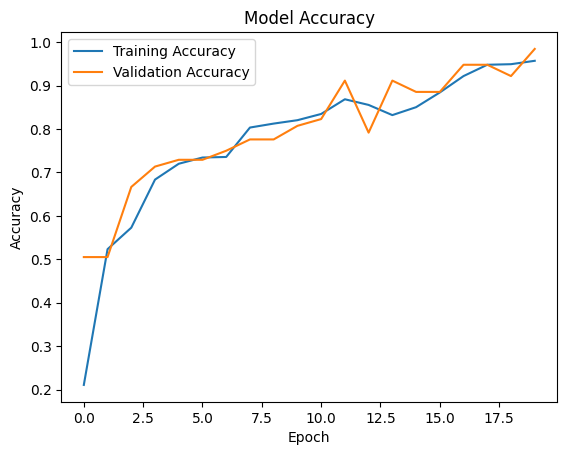

In [1201]:
plt.plot(history.history['accuracy'], label="Training Accuracy")
plt.plot(history.history['val_accuracy'], label="Validation Accuracy")
plt.title('model accuracy'.title())
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

Summarize History for loss

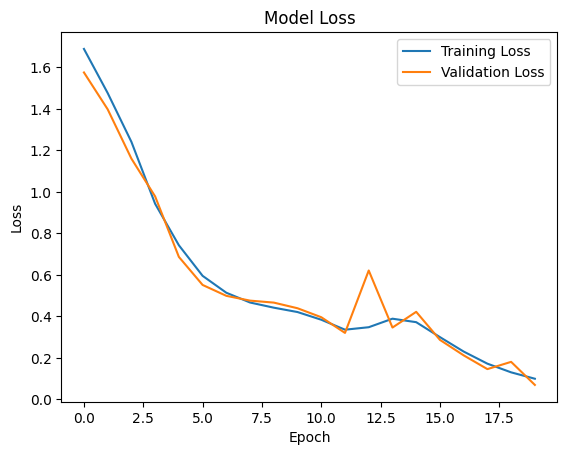

In [1202]:
plt.plot(history.history['loss'], label="Training Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

In [1203]:
X_train[0]

array([1, 1, 0, 1, 1, 0, 2, 0, 0, 0, 2, 0, 0, 0, 1, 1, 0, 0, 1, 0],
      dtype=int64)

In [1204]:
X_test

array([[1, 1, 1, ..., 1, 0, 0],
       [1, 1, 1, ..., 1, 0, 0],
       [1, 1, 0, ..., 0, 2, 0],
       ...,
       [1, 0, 0, ..., 1, 0, 0],
       [1, 1, 1, ..., 2, 2, 0],
       [0, 0, 1, ..., 0, 0, 0]], dtype=int64)

Testing the data with Training Data

In [1205]:
model.predict(X_test)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


array([[5.1896505e-02, 9.2276841e-01, 1.2148046e-02, 1.9921491e-01,
        2.1122289e-01, 6.3222885e-01],
       [9.9996638e-01, 9.9805421e-01, 8.4604008e-12, 1.0000000e+00,
        3.6875768e-08, 1.0000000e+00],
       [9.9972230e-01, 9.8872346e-01, 1.5103478e-08, 1.0000000e+00,
        8.4243184e-06, 9.9999946e-01],
       ...,
       [1.0000000e+00, 9.8127055e-01, 4.8236619e-09, 1.0000000e+00,
        1.8679132e-09, 1.0000000e+00],
       [1.7456986e-02, 9.7064531e-01, 5.4034167e-03, 1.1398615e-01,
        1.3979270e-01, 4.0103966e-01],
       [1.0000000e+00, 9.9584049e-01, 1.5429797e-12, 1.0000000e+00,
        8.0249300e-13, 1.0000000e+00]], dtype=float32)

In [1206]:
np.argmax(model.predict(np.array([[2,1,2,2,1,0,2,0,1,0,1,1,1,1,2,1,1,0,0,0]])))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


3

In [1207]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,precision_score,recall_score

In [1208]:
Y_pred=model.predict(X_test)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [1209]:
Y_pred

array([[5.1896505e-02, 9.2276841e-01, 1.2148046e-02, 1.9921491e-01,
        2.1122289e-01, 6.3222885e-01],
       [9.9996638e-01, 9.9805421e-01, 8.4604008e-12, 1.0000000e+00,
        3.6875768e-08, 1.0000000e+00],
       [9.9972230e-01, 9.8872346e-01, 1.5103478e-08, 1.0000000e+00,
        8.4243184e-06, 9.9999946e-01],
       ...,
       [1.0000000e+00, 9.8127055e-01, 4.8236619e-09, 1.0000000e+00,
        1.8679132e-09, 1.0000000e+00],
       [1.7456986e-02, 9.7064531e-01, 5.4034167e-03, 1.1398615e-01,
        1.3979270e-01, 4.0103966e-01],
       [1.0000000e+00, 9.9584049e-01, 1.5429797e-12, 1.0000000e+00,
        8.0249300e-13, 1.0000000e+00]], dtype=float32)

In [1210]:
target=["Vata","Pitta","Kapha","vata+pitta","vata+kapha","pitta+kapha"]

In [1211]:
y_predict_labels = [np.argmax(i) for i in Y_pred]
y_predict_labels

[1,
 3,
 3,
 3,
 5,
 1,
 3,
 0,
 2,
 3,
 1,
 2,
 1,
 1,
 0,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 0,
 2,
 3,
 3,
 3,
 3,
 5,
 4,
 3,
 1,
 1,
 4,
 3,
 3,
 4,
 3,
 3,
 0,
 3,
 0,
 1,
 3,
 2,
 0,
 3,
 3,
 3,
 3,
 3,
 0,
 3,
 5,
 0,
 5,
 3,
 0,
 3,
 3,
 3,
 3,
 0,
 3,
 3,
 1,
 3,
 3,
 1,
 3,
 1,
 0,
 0,
 3,
 1,
 3,
 2,
 0,
 0,
 2,
 5,
 3,
 2,
 3,
 1,
 3,
 0,
 0,
 3,
 0,
 3,
 0,
 3,
 3,
 0,
 3,
 3,
 3,
 1,
 3,
 0,
 0,
 0,
 3,
 3,
 3,
 3,
 1,
 3,
 0,
 3,
 3,
 0,
 0,
 3,
 3,
 2,
 5,
 3,
 1,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 3,
 1,
 3,
 0,
 0,
 1,
 3,
 0,
 3,
 3,
 1,
 3,
 1,
 0,
 3,
 1,
 0,
 3,
 5,
 2,
 3,
 0,
 3,
 1,
 2,
 3,
 3,
 3,
 3,
 3,
 0,
 1,
 1,
 3,
 4,
 5,
 3,
 3,
 3,
 3,
 3,
 3,
 0,
 3,
 3,
 0,
 4,
 3,
 0,
 1,
 0,
 3,
 3,
 5,
 3,
 1,
 3,
 3,
 0,
 0,
 3,
 0,
 1,
 3,
 1,
 0,
 0,
 3,
 4,
 1,
 1,
 3,
 0,
 1,
 0,
 0,
 0,
 3,
 1,
 3,
 2,
 3,
 3,
 3,
 3,
 0,
 4,
 3,
 3,
 0,
 0,
 0,
 5,
 0,
 3,
 3,
 2,
 1,
 0,
 3,
 3,
 0,
 1,
 3,
 0,
 2,
 2,
 0,
 0,
 3,
 0,
 1,
 0]

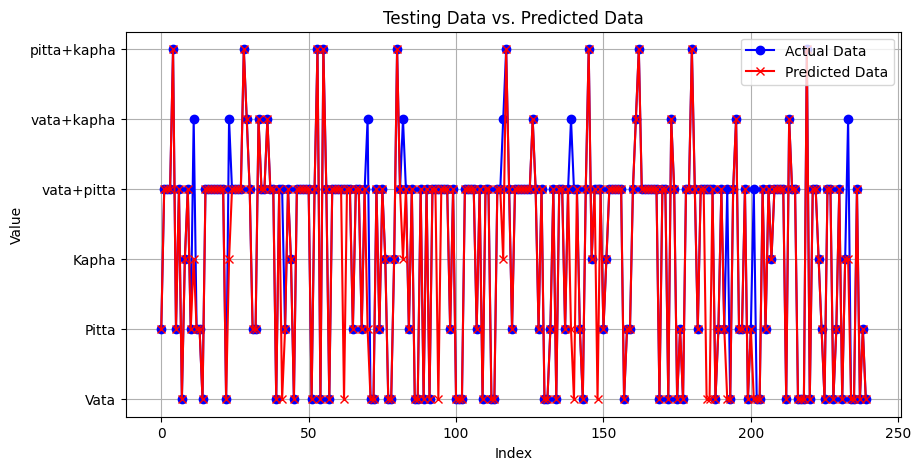

In [1212]:
plt.figure(figsize=(10, 5))
plt.plot(y_test, label='Actual Data', color='blue', marker='o')
plt.plot(y_predict_labels, label='Predicted Data', color='red', marker='x')
plt.title('Testing Data vs. Predicted Data')
plt.xlabel('Index')
plt.ylabel('Value')
plt.yticks(labels=target,ticks=range(0,6))
plt.legend(loc="upper right")
plt.grid(True)
plt.show()

In [1213]:
outputs=[target[i] for i in y_predict_labels]
outputs

['Pitta',
 'vata+pitta',
 'vata+pitta',
 'vata+pitta',
 'pitta+kapha',
 'Pitta',
 'vata+pitta',
 'Vata',
 'Kapha',
 'vata+pitta',
 'Pitta',
 'Kapha',
 'Pitta',
 'Pitta',
 'Vata',
 'vata+pitta',
 'vata+pitta',
 'vata+pitta',
 'vata+pitta',
 'vata+pitta',
 'vata+pitta',
 'vata+pitta',
 'Vata',
 'Kapha',
 'vata+pitta',
 'vata+pitta',
 'vata+pitta',
 'vata+pitta',
 'pitta+kapha',
 'vata+kapha',
 'vata+pitta',
 'Pitta',
 'Pitta',
 'vata+kapha',
 'vata+pitta',
 'vata+pitta',
 'vata+kapha',
 'vata+pitta',
 'vata+pitta',
 'Vata',
 'vata+pitta',
 'Vata',
 'Pitta',
 'vata+pitta',
 'Kapha',
 'Vata',
 'vata+pitta',
 'vata+pitta',
 'vata+pitta',
 'vata+pitta',
 'vata+pitta',
 'Vata',
 'vata+pitta',
 'pitta+kapha',
 'Vata',
 'pitta+kapha',
 'vata+pitta',
 'Vata',
 'vata+pitta',
 'vata+pitta',
 'vata+pitta',
 'vata+pitta',
 'Vata',
 'vata+pitta',
 'vata+pitta',
 'Pitta',
 'vata+pitta',
 'vata+pitta',
 'Pitta',
 'vata+pitta',
 'Pitta',
 'Vata',
 'Vata',
 'vata+pitta',
 'Pitta',
 'vata+pitta',
 'Kapha'

In [1214]:
print(classification_report(y_test,y_predict_labels))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91        48
           1       0.94      1.00      0.97        33
           2       0.64      1.00      0.78         9
           3       1.00      0.93      0.96       125
           4       1.00      0.53      0.70        15
           5       1.00      1.00      1.00        10

    accuracy                           0.93       240
   macro avg       0.90      0.91      0.89       240
weighted avg       0.95      0.93      0.93       240



In [1215]:
print(confusion_matrix(y_test,y_predict_labels))

[[ 48   0   0   0   0   0]
 [  0  33   0   0   0   0]
 [  0   0   9   0   0   0]
 [  9   0   0 116   0   0]
 [  0   2   5   0   8   0]
 [  0   0   0   0   0  10]]


In [1216]:
print(accuracy_score(y_test,y_predict_labels)*100)

93.33333333333333


In [1217]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predict_labels)

In [1218]:
cm

<tf.Tensor: shape=(6, 6), dtype=int32, numpy=
array([[ 48,   0,   0,   0,   0,   0],
       [  0,  33,   0,   0,   0,   0],
       [  0,   0,   9,   0,   0,   0],
       [  9,   0,   0, 116,   0,   0],
       [  0,   2,   5,   0,   8,   0],
       [  0,   0,   0,   0,   0,  10]])>

In [1219]:
import seaborn as sns
import matplotlib.pyplot as plt


[]

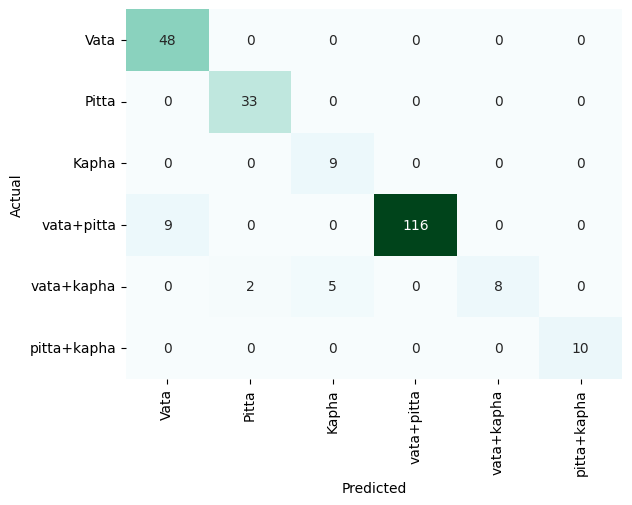

In [1220]:
sns.heatmap(cm,annot=True,fmt='d',xticklabels=target,yticklabels=target,cbar=False,cmap="BuGn")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.plot()

In [1221]:
print(recall_score(y_test,y_predict_labels,average="weighted"))

0.9333333333333333


In [1222]:
print(precision_score(y_test,y_predict_labels,average="weighted"))

0.9471710526315789


In [1223]:
from sklearn.metrics import f1_score


print(f1_score(y_test,y_predict_labels,average="weighted"))

0.9321889046977261


In [1224]:
target

['Vata', 'Pitta', 'Kapha', 'vata+pitta', 'vata+kapha', 'pitta+kapha']

In [1225]:
X_test[0]

array([1, 1, 1, 1, 2, 2, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0],
      dtype=int64)

In [1226]:
checking_values=np.array(X_test[1],ndmin=2)
print(checking_values)

[[1 1 1 1 0 1 0 0 1 2 1 0 1 1 0 0 1 1 0 0]]


In [1227]:
np.argmax(model.predict(checking_values))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


3

In [1228]:
Predicted_data=model.predict(checking_values)
print(Predicted_data)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
[[9.999664e-01 9.980542e-01 8.460433e-12 1.000000e+00 3.687584e-08
  1.000000e+00]]


In [1229]:
for i in range(2):
    index = np.argmax(prakruti_percentages[0])
    maximum = np.max(prakruti_percentages[0])
    print(target[index], "=>", maximum)
    prakruti_percentages = np.delete(prakruti_percentages, (0, index))

IndexError: index 0 is out of bounds for axis 0 with size 0